In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the cleaned dataset
df = pd.read_csv('cleaned_fuel_data.csv')

# 2. Drop 'Probe_Status' (all values are 'normal', not useful for prediction)
df = df.drop(columns=['Probe_Status'])

# 3. Define features and target
X = df.drop(columns=['Fuel_Quantity_L'])  # Features
y = df['Fuel_Quantity_L']                 # Target

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Print performance metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.00333410817195965
R² Score: 0.9999998430557134


In [8]:
import pandas as pd
import joblib

# === Load the trained model ===
model = joblib.load("fuel_quantity_model.pkl")

# === Load the faulty sensor data ===
df = pd.read_csv("fuel_data.csv")

# === Define features used during training ===
features = ['Timestamp_s', 'Flow_Rate_L_s', 'Pressure_kPa', 'Fuel_Quantity_L']

# === Make sure required columns are present ===
for col in features:
    if col not in df.columns:
        raise ValueError(f"❌ Missing column: {col}")

# === Make predictions ===
X = df[features]
df['predicted_fuel_quantity'] = model.predict(X)

# === Save to new CSV ===
df.to_csv("faulty_with_predictions.csv", index=False)
print("✅ Predictions saved to 'faulty_with_predictions.csv'")



✅ Predictions saved to 'faulty_with_predictions.csv'


/tmp/ipython-input-10-2321376318.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['Timestamp_s'] = pd.date_range(start='2024-01-01', periods=len(df), freq='1S')


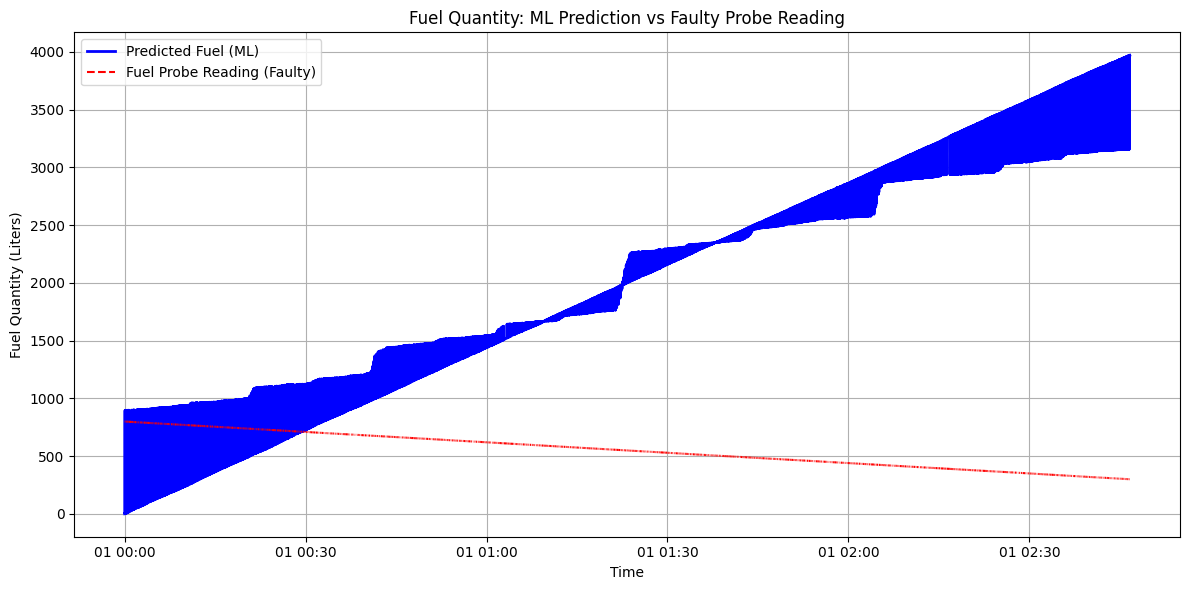

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load prediction results ===
df = pd.read_csv("faulty_with_predictions.csv")

# === Create synthetic timestamps (1 second intervals) ===
df['Timestamp_s'] = pd.date_range(start='2024-01-01', periods=len(df), freq='1S')

# === Plot ===
plt.figure(figsize=(12, 6))

# Predicted fuel quantity
plt.plot(df['Timestamp_s'], df['predicted_fuel_quantity'], label='Predicted Fuel (ML)', color='blue', linewidth=2)

# Fuel probe reading (which includes corrupted values)
plt.plot(df['Timestamp_s'], df['Fuel_Quantity_L'], label='Fuel Probe Reading (Faulty)', color='red', linestyle='--')

# Labels & styling
plt.title("Fuel Quantity: ML Prediction vs Faulty Probe Reading")
plt.xlabel("Time")
plt.ylabel("Fuel Quantity (Liters)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()